In [1]:
using ConstLab
using Plots
pyplot!()

Plots.PyPlotPackage()

In [2]:
include("mises_viscoplast.jl")

compute_residual (generic function with 1 method)

### Parameters

In [3]:
E = 200.0 * 10^9
ν =  0.3
σy = E / 1e3
H = 0.1 * E
n = 1.5
σc =  0.1 * 200*10^9
t_star = 1.0
mp = ViscoPlastMP(E, ν, σy, H, n, σc, t_star)

ViscoPlastMP
  E: 2.0e11
  ν: 0.3
  σy: 2.0e8
  H: 2.0e10
  n: 1.5
  σc: 2.0e10
  tstar: 1.0

### Material Status

In [4]:
ms = ViscoPlastMS()

ViscoPlastMS
  n_ε_p: [0.0,0.0,0.0,0.0,0.0,0.0]
  n_κ: 0.0
  n_μ: 0.0

### Loadcase: Uniaxial Strain

In [5]:
α = 25.0
tend = α * t_star
ts = collect(linspace(0, tend, 100))
ε_max = 0.005
εs_pstrain, σs_pstrain, ε_control_pstrain = loadcase(:uniaxial_strain, ε_max, ts);

### Driver

In [6]:
εs_res_pstrain, σs_res_pstrain, matstats = driver(ms, mp, ts, εs_pstrain, 
σs_pstrain, ε_control_pstrain);

### Loadcase: Uniaxial Stress

In [7]:
εs_pstress, σs_pstress, ε_control_pstress = loadcase(:uniaxial_stress, ε_max, ts);
εs_res_pstress, σs_res_pstress, matstats = driver(ms, mp, ts, εs_pstress, 
                                                  σs_pstress, ε_control_pstress, ftol = 1e-5);

### Plotting

In [8]:
function vm(x)
    x = Idev6 * x
    sqrt(3/2) * sqrt(x[1]^2 + x[2]^2 + x[3]^2 + (2x[4])^2 + (2x[5])^2 + (2x[6])^2)
end

vm (generic function with 1 method)

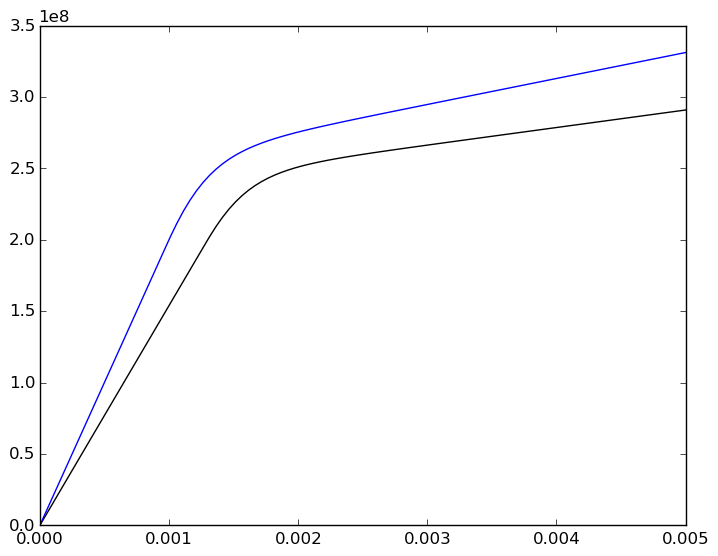

Plot{Plots.PyPlotPackage() n=2}

In [10]:
p = plot(εs_res_pstrain, σs_res_pstrain, matstats; x_mod = 1, y_mod = vm);
plot!(p, εs_res_pstress, σs_res_pstress, matstats, x_mod = 1, y_mod = vm)